In [3]:
import pyodbc
import pandas as pd
import numpy as np
from sklearn  import tree
from IPython.display import Image
import pydotplus


In [5]:
# Define the connection string
conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};Server=(localdb)\\MSSQLLocalDB;Database=PCS;Trusted_Connection=yes;"
)

# Establish the connection
conn = pyodbc.connect(conn_str)

# Create a cursor object
cursor = conn.cursor()

# Define the table name
table_name = "attack_scenarios"

# Execute the query to retrieve column names
cursor.execute(f"SELECT * FROM [{table_name}];")

# Fetch all results
rows = cursor.fetchall()

# Fetch column names from the cursor description
column_names = [column[0] for column in cursor.description]

# Close the cursor and connection
cursor.close()
conn.close()

# Create a DataFrame from the rows and column names
df = pd.DataFrame.from_records(rows, columns=column_names)


In [6]:
y = df['attack_outcome']
x = df.drop(columns=['attack_outcome'])

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.398325 to fit



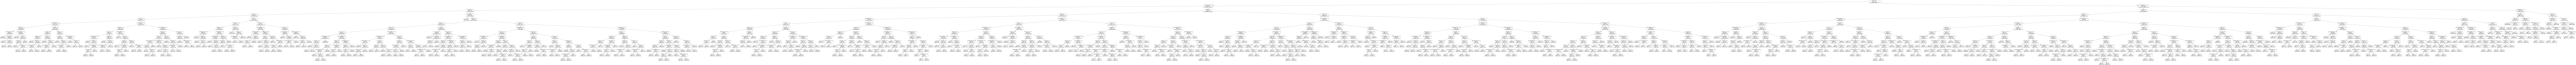

In [7]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())   